Nama : Ferli Malkan Amien <br>
NPM  : 2117051050 <br>
Kelas: C <br>

# Ujian Tengah Semester - Machine Learning
Senin, 10 April 2023

## Library

In [16]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Data Identification

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/credit_dataset.csv")
df

,customer_id,balance_number,balance_frequency,purchases_number,purchases_conditional,purchases_installment,purchases_cash,purchases_frequency,purchases_frequency_conditional,purchases_frequency_installment,...,purchases_cash_advance,purchases_trx,limit_credit,payment_number,payment_minimum,payment_total,tenure,tax_number,tax_cash,tax_total
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,NaN,NaN,NaN
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NaN,NaN,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,NaN,NaN,NaN
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,NaN,0.000000,12,NaN,NaN,NaN
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,NaN,NaN,NaN
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,NaN,0.000000,6,NaN,NaN,NaN
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,NaN,NaN,NaN
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,NaN,NaN,NaN


In [19]:
df.head()

,customer_id,balance_number,balance_frequency,purchases_number,purchases_conditional,purchases_installment,purchases_cash,purchases_frequency,purchases_frequency_conditional,purchases_frequency_installment,...,purchases_cash_advance,purchases_trx,limit_credit,payment_number,payment_minimum,payment_total,tenure,tax_number,tax_cash,tax_total
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,NaN,NaN,NaN
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NaN,NaN,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,NaN,NaN,NaN
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,NaN,0.000000,12,NaN,NaN,NaN
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,NaN,NaN,NaN


## Exploratory Data Analisis (EDA)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      8950 non-null   object 
 1   balance_number                   8950 non-null   float64
 2   balance_frequency                8950 non-null   float64
 3   purchases_number                 8950 non-null   float64
 4   purchases_conditional            8950 non-null   float64
 5   purchases_installment            8950 non-null   float64
 6   purchases_cash                   8950 non-null   float64
 7   purchases_frequency              8950 non-null   float64
 8   purchases_frequency_conditional  8950 non-null   float64
 9   purchases_frequency_installment  8950 non-null   float64
 10  purchases_cash_frequency         8950 non-null   float64
 11  purchases_cash_advance           8950 non-null   int64  
 12  purchases_trx       

In [21]:
df.describe()

,balance_number,balance_frequency,purchases_number,purchases_conditional,purchases_installment,purchases_cash,purchases_frequency,purchases_frequency_conditional,purchases_frequency_installment,purchases_cash_frequency,purchases_cash_advance,purchases_trx,limit_credit,payment_number,payment_minimum,payment_total,tenure,tax_number,tax_cash,tax_total
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000,0.0,0.0,0.0
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,NaN,NaN,NaN
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,NaN,NaN,NaN
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000,NaN,NaN,NaN
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,NaN,NaN,NaN
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000,NaN,NaN,NaN
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,NaN,NaN,NaN


In [22]:
df.shape

(8950, 21)

## Preprocessing

In [23]:
print("Cek missing value")
print(df.isnull().sum().sum())

Cek missing value
27164


In [24]:
df = df.drop(["customer_id","tax_number",	"tax_cash",	"tax_total"], axis = 1)
df = df.dropna(axis=1)
df

,balance_number,balance_frequency,purchases_number,purchases_conditional,purchases_installment,purchases_cash,purchases_frequency,purchases_frequency_conditional,purchases_frequency_installment,purchases_cash_frequency,purchases_cash_advance,purchases_trx,payment_number,payment_total,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,325.594462,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,275.861322,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,81.270775,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,52.549959,0.250000,6


In [25]:
# rescale data-nya
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df)
scaled_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52897879,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.81864213,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.38380474,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.5706145 ,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.58053567,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.57686873,
        -0.52555097, -4.12276757]])

## Modeling

12.963144506369826


<function matplotlib.pyplot.show(close=None, block=None)>

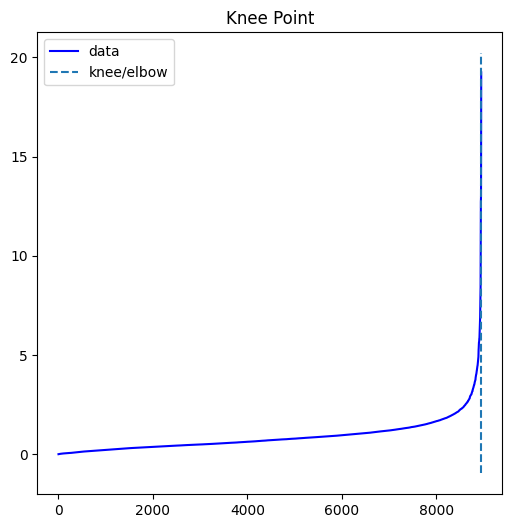

In [26]:
# mencari rentang nilai disetiap tetangga
nbrs = NearestNeighbors().fit(scaled_data)
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

# plot datanya
k_dist = sort_neigh_dist[:, 4]
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "concave", direction = "increasing", online=True)

# mencari nilai epsilon yang didapat dari knee poin
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show

Pada UTS Responsi Machine Learning kali ini saya memilih DBSCAN sebagai metode yang saya gunakan dikarenakan DBSCAN memiliki beberapa keunggulan, seperti : <br>
1. DBSCAN dapat menemukan cluster yang memiliki bentuk dan ukuran yang beragam, serta dapat menangani data yang tidak terlalu padat (sparse) atau memiliki noise.
2. DBSCAN memiliki kemampuan untuk menghilangkan noise dalam data.
3. DBSCAN tidak memerlukan jumlah cluster yang ditentukan sebelumnya. 
4. DBSCAN dapat menangani cluster yang saling tumpang tindih (overlap).

Yang mana saya rasa metode tersebut sangat tepat untuk digunakan pada data kali ini.

Selain itu, pemilihan metode DBSCAN juga berkesinambungan dengan pemilihan metode evaluasi yang saya gunakan, yaitu silhouette score.

In [27]:
clusters = DBSCAN(eps = 9, min_samples = 12).fit(scaled_data)
label = clusters.labels_
np.unique(label)

array([-1,  0])

## Visualisasi

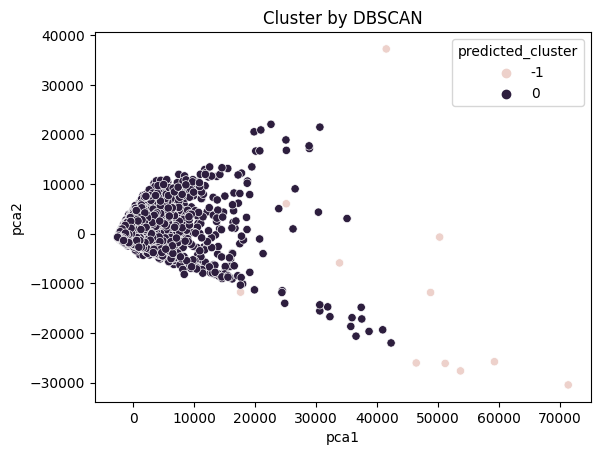

In [28]:
df["predicted_cluster"] = label

reduced_data = PCA(n_components=2).fit_transform(df)
df_reduced_data = pd.DataFrame(reduced_data, columns=["pca1", "pca2"])
sns.scatterplot(x = "pca1", y = "pca2", hue = df["predicted_cluster"], data = df_reduced_data)
plt.title("Cluster by DBSCAN")
plt.show()

## Evaluasi

In [29]:
# "The best value is 1 and the worst value is -1.
# Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample
# has been assigned to the wrong cluster, 
# as a different cluster is more similar."
# source : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

ss = silhouette_score(df, label)
print(f"Akurasi berdasarkan Silhouette score adalah: {ss}")

Akurasi berdasarkan Silhouette score adalah: 0.9090169191216656
